In [1]:
%%time

!pip install openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 5.9 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 6.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.3 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=803321 sha256=50373d9504c28940aa1b8c6e4cdcdecf937e10bd63ea9c7fbd4930b75a72716b
  Stored in directory: /root/.cache/pip/wheels/dd/4a/1f/d1c4bf3b9133c8168fe617ed979cab7b14fe381d059ffb9d83
Successfully built openai-whisper
CPU times: user 762 ms, sys: 171 ms, total: 932 ms
Wall time: 38.7 s


In [2]:
%%time

!pip install openai-whisper googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 3.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=aef50473f4ea5bbf6ad35a89469d9d3a615044414b820b630287c6aaf4170b23
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14

In [3]:
%%time

import warnings
warnings.filterwarnings('ignore')

CPU times: user 57 µs, sys: 14 µs, total: 71 µs
Wall time: 74.4 µs


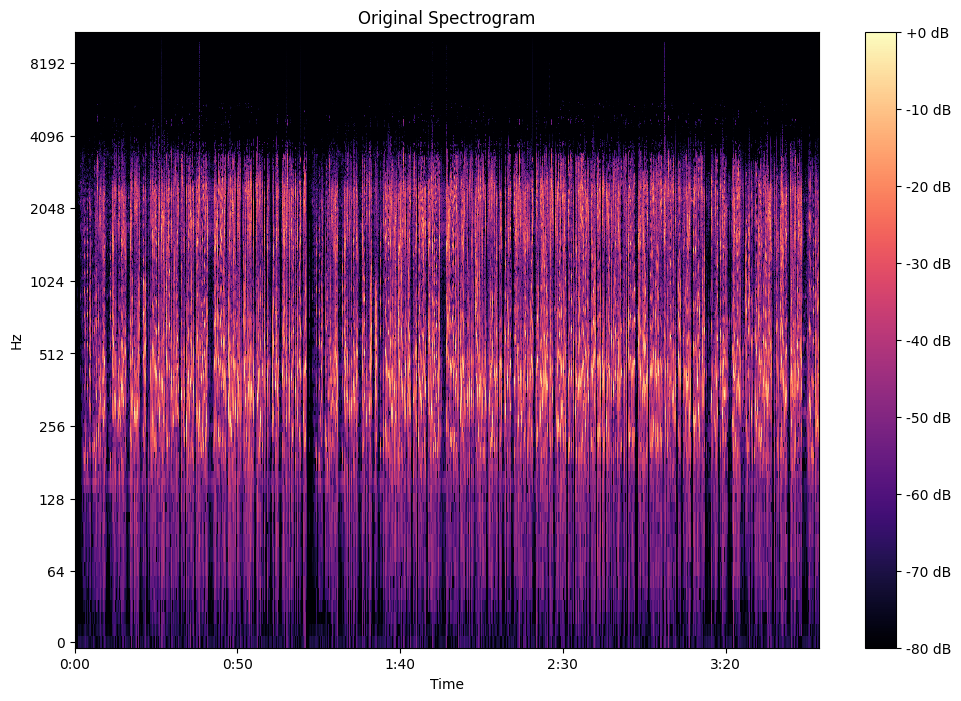

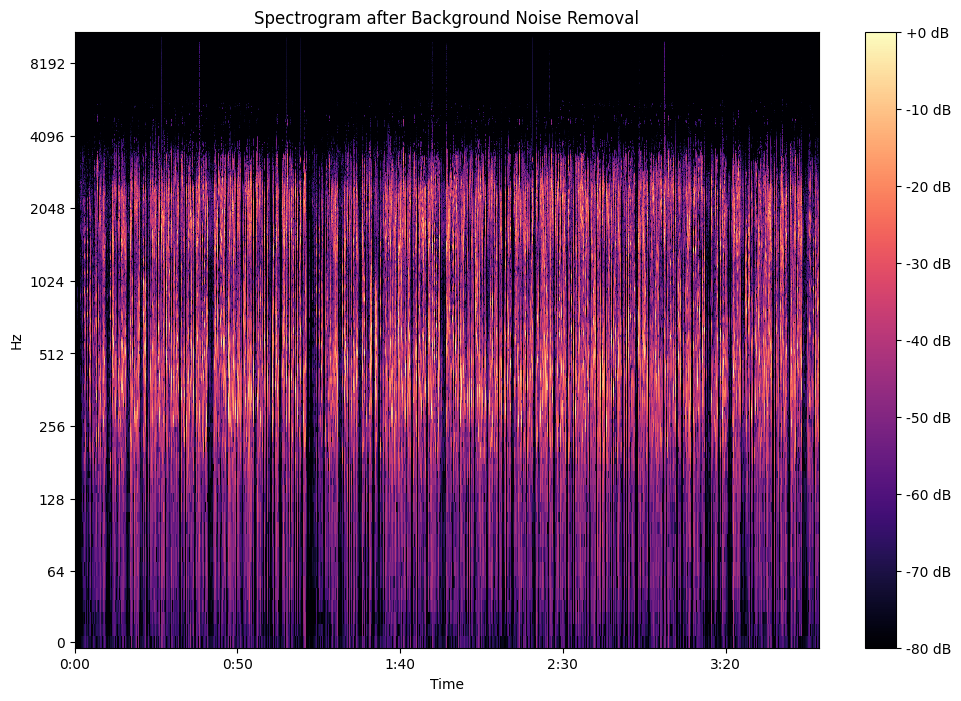

CPU times: user 45 s, sys: 3.16 s, total: 48.1 s
Wall time: 50.4 s


In [4]:
%%time

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import os

# Load the audio file
audio_file_path = "/kaggle/input/arabic-natural-audio-dataset/V4.wav"

# Replace with the path to your audio file
y, sr = librosa.load(audio_file_path)

# Display the original spectrogram
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 8))
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Spectrogram')
plt.show()

# Apply background noise removal
y_harmonic, y_percussive = librosa.effects.hpss(y)
y_noise_removed = y - y_harmonic

# Display the spectrogram after background noise removal
D_noise_removed = librosa.amplitude_to_db(np.abs(librosa.stft(y_noise_removed)), ref=np.max)
plt.figure(figsize=(12, 8))
librosa.display.specshow(D_noise_removed, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram after Background Noise Removal')
plt.show()

In [5]:
%%time

import whisper

# Load the Whisper model
model = whisper.load_model('base')

# Load and transcribe the audio file
audio_file = y_noise_removed
text = model.transcribe(audio_file)

# Print the transcribed text
text['text']

100%|███████████████████████████████████████| 139M/139M [00:02<00:00, 59.7MiB/s]


CPU times: user 5min 55s, sys: 2.7 s, total: 5min 58s
Wall time: 3min 4s


" . . . . . . . ضروا مقفر هذا ما حقا RP إlesslists ما ال�velية أوموclipse برила الأ席 كانت أוכل�에 بقمه to the bakery طول مسائريا أنه used to the cottage Everyyk for day لم يتمنى ش spannدة أفضل مشجل لم يترى سوية نmeye بممر . ثم لم يتitusون الذين يمد zucchini طبيques جديد أخعمها إنه في القفر عند wording groot ну framing الافق� التي ضي資ه استخدام أن تأتي من الأمر نقوم للهمbow Grid وعأمهم وع Orleans المقفحة ونجمع للمسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في الم فاخر أخرجGReli ، Mont-osekin\x7f مدينة في المسكينة في the earth's أخرج Something like that has made us a year هناك المتقينة في المسكينة في المسكينة في ال

In [6]:
%%time

print(text)

{'text': " . . . . . . . ضروا مقفر هذا ما حقا RP إlesslists ما ال�velية أوموclipse برила الأ席 كانت أוכل�에 بقمه to the bakery طول مسائريا أنه used to the cottage Everyyk for day لم يتمنى ش spannدة أفضل مشجل لم يترى سوية نmeye بممر . ثم لم يتitusون الذين يمد zucchini طبيques جديد أخعمها إنه في القفر عند wording groot ну framing الافق� التي ضي資ه استخدام أن تأتي من الأمر نقوم للهمbow Grid وعأمهم وع Orleans المقفحة ونجمع للمسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في المسكينة في الم فاخر أخرجGReli ، Mont-osekin\x7f مدينة في المسكينة في the earth's أخرج Something like that has made us a year هناك المتقينة في المسكينة في المسك

In [7]:
%%time

result = model.transcribe(audio_file, language='ar')

CPU times: user 3min 53s, sys: 1.43 s, total: 3min 55s
Wall time: 1min 57s


In [8]:
%%time

result

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


{'text': ' نعم شاوات بصicher ولد TF والي المحرس فعود معق مالقف بالنقي تصبح وفي المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة الم وفي المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنطقة المنط المنطقة المنطقة المنطقة المنطقة الم

In [9]:
%%time

from googletrans import Translator
import whisper

# Load Whisper model
model = whisper.load_model('base')

# Transcribe the audio
audio_file = "/kaggle/input/arabic-natural-audio-dataset/V4.wav"
result = model.transcribe(audio_file)

# Translate the transcribed text into English
transcribed_text = result.get('text')
if transcribed_text:
    translator = Translator()
    translated_result = translator.translate(transcribed_text, dest='en')

# Print the translated text
    print("Translated Text:", translated_result.text)
else:
    print("Error: Transcription result is empty. Cannot proceed with translation.")

Translated Text: Parliament and the contempt of the Ministry of Finance, the thief, and the dog's valley.Hizmara and Zina Al -Ghaida responds to them and withdraws a cloudy dinar that is without what they consult me ​​and said, I am upset with me and that she is distilled and very unfortunately I am withdrawing myself from this company that does not redeem a client before you take this buttocks and the steps of what is in my wife my sister who is used in the duties of Allo, hello?Together, the things are in a poetry in the drink, of course, the place is exported, of course, I am the most important.Zain and Hakkar and the Ministry of Finance, which Lad Al -Kalb's sauce is that it is a love of dinar without returning to me with permission, Berki.Tel Hakira and Zamana stupid responds to them and withdraws a dinar from a branch without what they consult me ​​with the treasures.And I study the pods with the allowance of a company with a clouds from its balance currency, which is worth even 